In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv('drug200(DT).csv')

In [72]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [73]:
df.isnull().sum()


,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [74]:
# for col in df.columns:
#     print(col, "→", df[col].unique())
# This prints the actual unique values of every column without using a loop
df.apply(lambda col: col.unique())



,0
Age,"[23, 47, 28, 61, 22, 49, 41, 60, 43, 34, 74, 5..."
Sex,"[F, M]"
BP,"[HIGH, LOW, NORMAL]"
Cholesterol,"[HIGH, NORMAL]"
Na_to_K,"[25.355, 13.093, 10.114, 7.798, 18.043, 8.607,..."
Drug,"[drugY, drugC, drugX, drugA, drugB]"


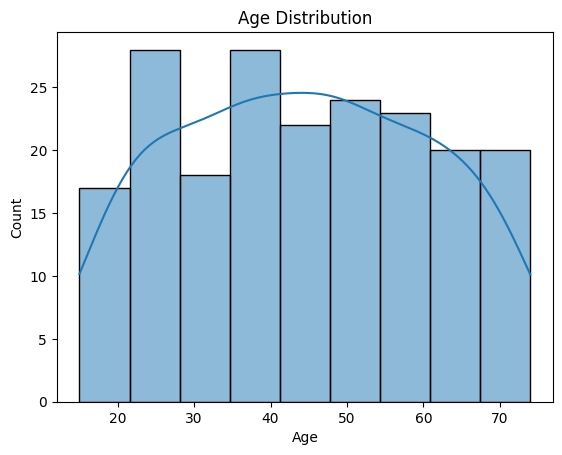

In [75]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()




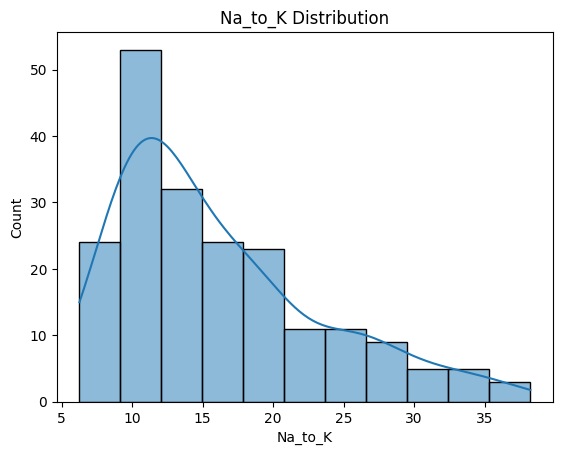

In [76]:
sns.histplot(df['Na_to_K'], kde=True)
plt.title("Na_to_K Distribution")
plt.show()

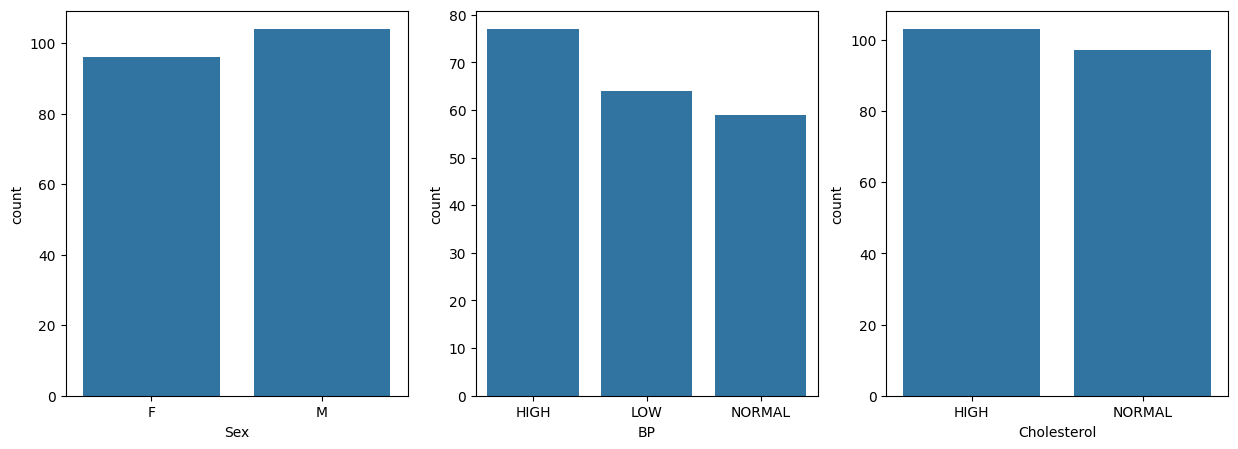

In [77]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.countplot(x="Sex", data=df)

plt.subplot(1,3,2)
sns.countplot(x="BP", data=df)

plt.subplot(1,3,3)
sns.countplot(x="Cholesterol", data=df)

plt.show()



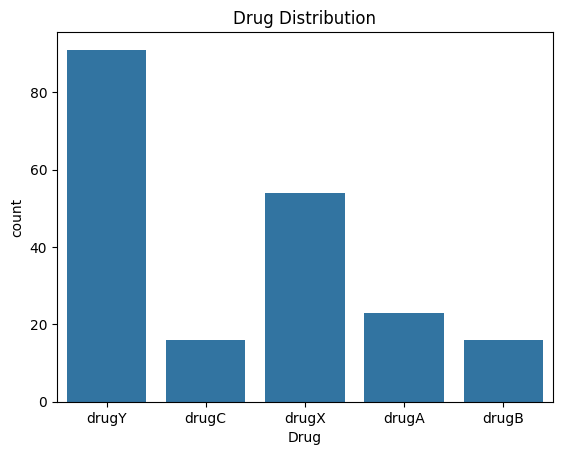

In [78]:
sns.countplot(x="Drug", data=df)
plt.title("Drug Distribution")
plt.show()

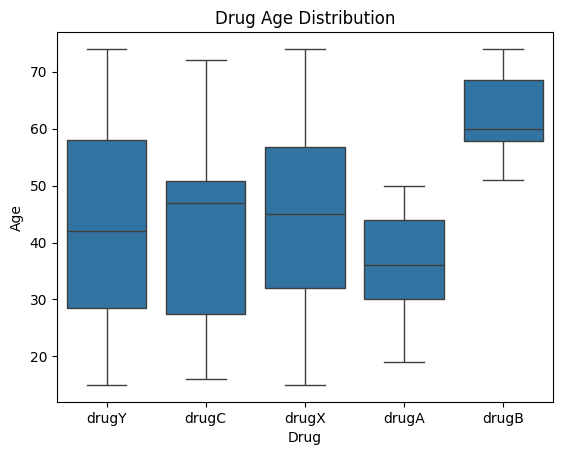

In [79]:
sns.boxplot(x="Drug", y ="Age", data=df)
plt.title("Drug Age Distribution")
plt.show()

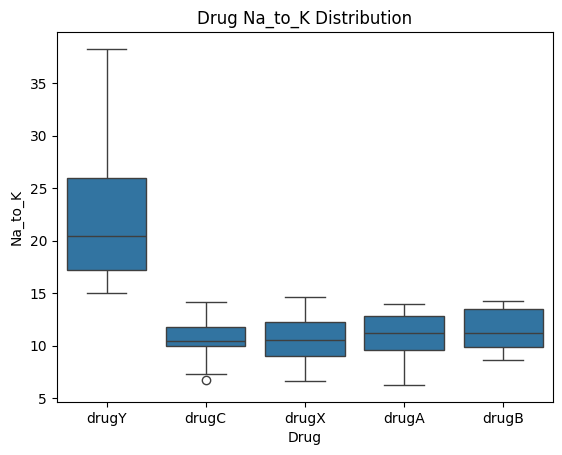

In [80]:
sns.boxplot(x="Drug",y="Na_to_K", data=df)
plt.title("Drug Na_to_K Distribution")
plt.show()

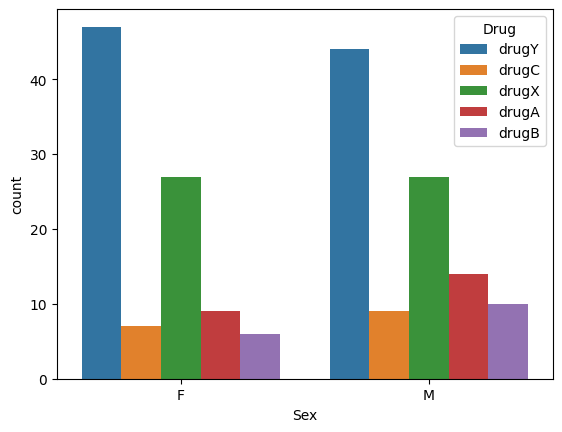

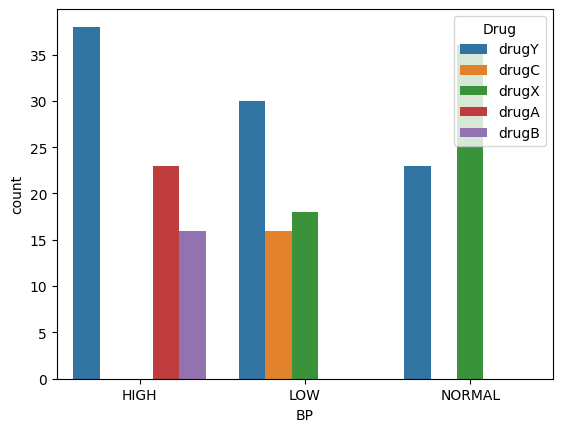

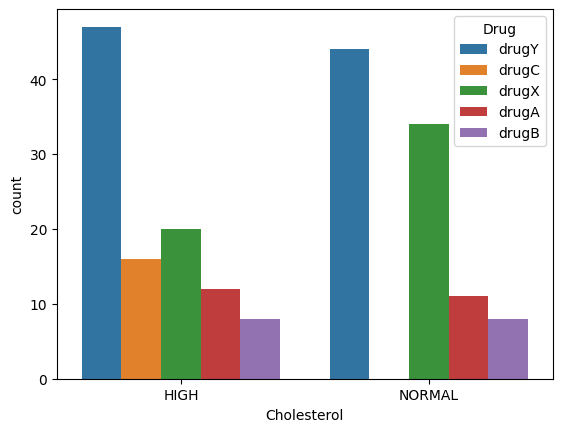

In [81]:
sns.countplot(x="Sex", hue="Drug", data=df)
plt.show()

sns.countplot(x="BP", hue="Drug", data=df)
plt.show()

sns.countplot(x="Cholesterol", hue="Drug", data=df)
plt.show()


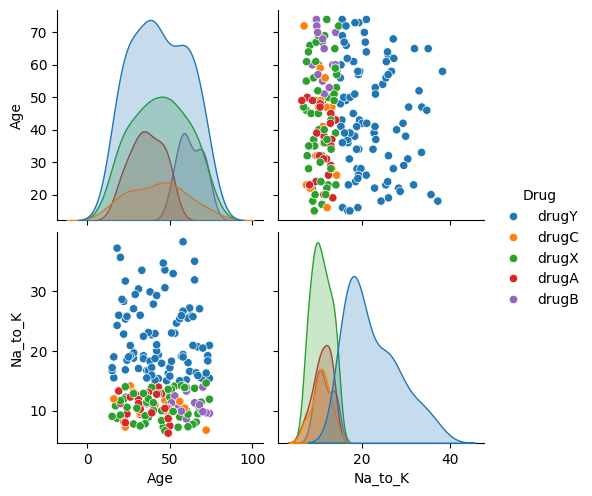

In [82]:
sns.pairplot(df, hue="Drug")
plt.show()

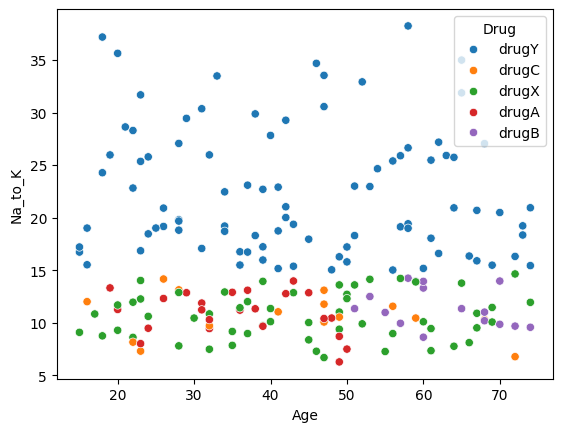

In [83]:
sns.scatterplot(x="Age", y="Na_to_K", hue="Drug", data=df)
plt.show()
#

In [84]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [85]:
categorical_cols = ['Sex', 'BP', 'Cholesterol']
numeric_cols = ['Age', 'Na_to_K']


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [88]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', DecisionTreeClassifier())
])

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Na_to_K'])])),
                ('classifier', DecisionTreeClassifier())])

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

X = df.drop('Drug', axis=1)
y = df['Drug']

categorical_cols = ['Sex', 'BP', 'Cholesterol']
numeric_cols = ['Age', 'Na_to_K']

preprocess = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [91]:
# Dictionary to store results
model_accuracies = {}
fitted_models = {}

In [92]:
# Build + Train Model
dt_model = Pipeline([
    ('preprocess', preprocess),
    ('clf', DecisionTreeClassifier(random_state=42))
])



In [93]:
dt_model.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Na_to_K'])])),
                ('clf', DecisionTreeClassifier(random_state=42))])

In [94]:
# Predict
y_pred = dt_model.predict(X_test)



In [95]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)



In [96]:
# Print Results
print("Decision Tree Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf_model = Pipeline([
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(...))
])


In [99]:
from sklearn.ensemble import RandomForestClassifier
# Fix: Define RandomForestClassifier with a valid integer for n_estimators
rf_model = Pipeline([
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Na_to_K'])])),
                ('clf', RandomForestClassifier(random_state=42))])

In [100]:
y_pred = rf_model.predict(X_test)


In [101]:
accuracy = accuracy_score(y_test, y_pred)


In [102]:
print("Decision Tree Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


In [103]:
from sklearn.svm import SVC

In [104]:
svm_pipe = Pipeline([
    ('preprocess', preprocess),
    ('clf', SVC(kernel='rbf', probability=True, random_state=42))
])


In [105]:
svm_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Na_to_K'])])),
                ('clf', SVC(probability=True, random_state=42))])

In [106]:

y_pred_svm = svm_pipe.predict(X_test)



In [107]:
acc_svm = accuracy_score(y_test, y_pred_svm)
model_accuracies["SVM"] = acc_svm
fitted_models["SVM"] = svm_pipe



In [108]:
print("\n========== SVM ==========")
print("Accuracy:", acc_svm)
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



========== SVM ==========
Accuracy: 0.625
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       0.42      0.91      0.57        11
       drugY       0.94      1.00      0.97        15

    accuracy                           0.62        40
   macro avg       0.27      0.38      0.31        40
weighted avg       0.47      0.62      0.52        40

Confusion Matrix:
 [[ 0  0  0  6  0]
 [ 0  0  0  3  0]
 [ 0  0  0  5  0]
 [ 0  0  0 10  1]
 [ 0  0  0  0 15]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [109]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [110]:
knn_pipe = Pipeline([
    ('preprocess', preprocess),
    ('clf', KNeighborsClassifier(n_neighbors=5))
])


In [111]:
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Sex', 'BP', 'Cholesterol']),
                                                 ('num', 'passthrough',
                                                  ['Age', 'Na_to_K'])])),
                ('clf', KNeighborsClassifier())])

In [112]:
y_pred_knn = knn_pipe.predict(X_test)



In [113]:
acc_knn = accuracy_score(y_test, y_pred_knn)
model_accuracies["KNN"] = acc_knn
fitted_models["KNN"] = knn_pipe



In [114]:
print("\n========== KNN ==========")
print("Accuracy:", acc_knn)
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


========== KNN ==========
Accuracy: 0.675
              precision    recall  f1-score   support

       drugA       0.60      0.50      0.55         6
       drugB       0.20      0.33      0.25         3
       drugC       1.00      0.20      0.33         5
       drugX       0.50      0.64      0.56        11
       drugY       1.00      1.00      1.00        15

    accuracy                           0.68        40
   macro avg       0.66      0.53      0.54        40
weighted avg       0.74      0.68      0.67        40

Confusion Matrix:
 [[ 3  0  0  3  0]
 [ 0  1  0  2  0]
 [ 1  1  1  2  0]
 [ 1  3  0  7  0]
 [ 0  0  0  0 15]]


In [115]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]



In [116]:
print("\n=====================================")
print(" BEST MODEL:", best_model_name)
print(" BEST ACCURACY:", best_model_accuracy)
print("=====================================")




 BEST MODEL: KNN
 BEST ACCURACY: 0.675


In [117]:
# Save best model
best_model = fitted_models[best_model_name]
joblib.dump(best_model, f"best_model_{best_model_name.replace(' ','_')}.pkl")


['best_model_KNN.pkl']

In [118]:
print(f"\nSaved Best Model as: best_model_{best_model_name.replace(' ','_')}.pkl")


Saved Best Model as: best_model_KNN.pkl
